# Thinkful Data Science Unit 1: Capstone
## Comparing Results of Boxing Bouts According to Physical Attributes
-----------------
### Author: Randy Ramirez

**Email: ramirez6017@sbcglobal.net**

![Alternate Text](https://www.sport.cam.ac.uk/sites/www.sport.cam.ac.uk/files/styles/leading/public/images/sports_teams/boxing/boxing_2.jpg?itok=w7LktZOG)

This dataset shows the physical attributes of two competing boxers (A and B; respectively) over the course of 387,427 bouts.  Along with the results of each bout, the dataset includes the age, height, weight, reach, stance, and pre-match boxing record of each boxer A and B.  The post-match results are either Win A, Win B, or Draw. These are further categorized into several decisions, along with the points awarded by each of the three judges.


In this analysis, we will explore the relationship between the variables, such as comparison of age, height, weight, reach and stance, and also determine what characteristics are more likely to lead to a Win.


*Data Source:* scraped from [BoxRec](https://en.wikipedia.org/wiki/BoxRec) by a Kaggle user who has taken down the previously shared data 



> *"When asked how important BoxRec was to him, boxing promoter Lou DiBella stated that "anyone in boxing who says he doesn't use BoxRec is either a complete imbecile or lying" and Bruce Trampler, the matchmaker for Top Rank, said that "short of actually being at a fight, they're the best source of information out there."[3]"*

In 2016, the Association of Boxing Commissions (ABC) voted to recognize Boxrec as an official record keeper alongside Fight Fax.[5]


# Contents

- [Import Modules and Load Data](#Import-Modules-and-Load-Data)

- [What Does the Data Look Like?](#What-Does-the-Data-Look-Like?)

- [Organizing the Data](#Organizing-the-Data)
    - [Creating a new dataframe](#Creating-a-new-dataframe)
    - [Filter features of winning boxers](#Filter-features-of-winning-boxers)
    - [Filter features of losing boxers](#Filter-features-of-losing-boxers)

- [Clean the Data](#Clean-the-Data)
    - [A note about reach](#A-note-about-reach)

- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [What are the average boxers' characteristics?](#What-are-the-average-boxers'-characteristics?) 
    - [How do these characteristics compare between winners and losers?](#How-do-these-characteristics-compare-between-winners-and-losers?) 

- [T-tests](#T-tests)
    - [Preparing samples of winning and losing boxers](#Preparing-samples-of-winning-and-losing-boxers)
    - [Are the differences between winners and losers statistically significant?](#Are-the-differences-between-winners-and-losers-statistically-significant?)

- [Additional Research Proposal](#Additional-/-Research-/-Proposal)

--------------------
# Import Modules and Load Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We rename the two knockout columns to explicitly indicate their meaning.

In [0]:
boxing = pd.read_csv("https://raw.githubusercontent.com/andandandand/CSV-datasets/master/bouts_out_new.csv")
boxing.rename(columns = {'kos_A': 'knockouts_A',
                            'kos_B':'knockouts_B'}, inplace=True)

----------------
# What Does the Data Look Like?

Here we list all of the columns and confirm that the change above has been made.

In [51]:
boxing.columns

Index(['age_A', 'age_B', 'height_A', 'height_B', 'reach_A', 'reach_B',
       'stance_A', 'stance_B', 'weight_A', 'weight_B', 'won_A', 'won_B',
       'lost_A', 'lost_B', 'drawn_A', 'drawn_B', 'knockouts_A', 'knockouts_B',
       'result', 'decision', 'judge1_A', 'judge1_B', 'judge2_A', 'judge2_B',
       'judge3_A', 'judge3_B'],
      dtype='object')

The data has 387,427 rows and 26 columns.

In [52]:
boxing.shape

(387427, 26)

Here we see the acronyms for the various types of boxing decisions in our dataset: Split Decision (SD), Unanimous Decision (UD), Knockout (KO), Technical Knockout (TKO), Majority Decision (MD), Corner Retirement (RTD), Technical Decision (TD), Points Decision (PTS), Disqualification (DQ), and Newspaper Decision (NWS). It is important to note NWS is an antiquated method for scoring boxing matches in which a consensus of sportswriters would make a ruling on the results of the bout. However, both boxers' official record would show a Draw.

In [53]:
boxing.decision.unique()

array(['SD', 'UD', 'KO', 'TKO', 'MD', 'RTD', 'TD', 'PTS', 'DQ', 'NWS'],
      dtype=object)

We want a count of all the values that are missing (NaN).

In [54]:
boxing.isnull().sum(axis = 0)

age_A           34539
age_B          129492
height_A       138181
height_B       252787
reach_A        275085
reach_B        349554
stance_A       156418
stance_B       156418
weight_A       251854
weight_B       257069
won_A               0
won_B               0
lost_A              0
lost_B              0
drawn_A             0
drawn_B             0
knockouts_A         0
knockouts_B        79
result              0
decision            0
judge1_A       335179
judge1_B       335367
judge2_A       317056
judge2_B       317395
judge3_A       326196
judge3_B       326404
dtype: int64

#Organizing the Data

### Creating a new dataframe

In order to sort by Wins, Losses and Draws, we create a new dataframe and consolidate the two boxing groups.

In [0]:
newBoxingDf = pd.DataFrame({"age": [], "height": [], "reach": [], "result":[],  "stance": [], "weight": []})

### Filter features of winning boxers

In [0]:
ageColumn = []
heightColumn = []
reachColumn = []
resultColumn = []
stanceColumn = []
weightColumn = []

for index, row in boxing.iterrows():  
  
  if row['result'] == 'win_A':
    ageColumn.append(row['age_A'])
    heightColumn.append(row['height_A'])
    weightColumn.append(row['weight_A'])
    resultColumn.append('won')
    reachColumn.append(row['reach_A'])
    stanceColumn.append(row['stance_A'])
  elif row['result'] == 'win_B':
    ageColumn.append(row['age_B'])
    heightColumn.append(row['height_B'])
    reachColumn.append(row['reach_B'])
    stanceColumn.append(row['stance_B'])
    weightColumn.append(row['weight_B'])
    resultColumn.append('won')

### Filter features of losing boxers

In [0]:
for index, row in boxing.iterrows():  
  
  if row['result'] == 'win_B':
    ageColumn.append(row['age_A'])
    heightColumn.append(row['height_A'])
    reachColumn.append(row['reach_A'])
    resultColumn.append('lost')
    stanceColumn.append(row['stance_A'])
    weightColumn.append(row['weight_A'])
  elif row['result'] == 'win_A':
    ageColumn.append(row['age_B'])
    heightColumn.append(row['height_B'])
    reachColumn.append(row['reach_B'])
    resultColumn.append('lost')
    stanceColumn.append(row['stance_B'])
    weightColumn.append(row['weight_B'])
  elif row['result'] == 'draw':
    ageColumn.append(row['age_A'])
    ageColumn.append(row['age_B'])
    heightColumn.append(row['height_A'])
    heightColumn.append(row['height_B'])
    reachColumn.append(row['reach_A'])
    reachColumn.append(row['reach_B'])
    resultColumn.append('draw')
    resultColumn.append('draw')
    stanceColumn.append(row['stance_A'])
    stanceColumn.append(row['stance_B'])
    weightColumn.append(row['weight_A'])
    weightColumn.append(row['weight_B'])

In [58]:
newBoxingDf = pd.DataFrame({"age": ageColumn, "height": heightColumn, "reach": reachColumn, "result": resultColumn,  "stance": stanceColumn, "weight": weightColumn})

newBoxingDf.describe()

,age,height,reach,weight
count,610823.000000,383886.000000,150215.000000,265931.000000
mean,25.331238,172.820327,178.887035,146.707717
std,9.206592,9.236737,12.785571,30.431597
min,-74.000000,2.000000,1.000000,2.000000
25%,22.000000,166.000000,170.000000,126.000000
50%,25.000000,173.000000,178.000000,140.000000
75%,28.000000,178.000000,185.000000,160.000000
max,2016.000000,255.000000,456.000000,450.000000


------------------------
# Clean the Data

First, we remove any missing (NaN) age values. Then we remove any rows with age values below 16 and beyond three standard deviations. Additionally, because reach is closely related to height, we remove reach values that are below the min and above the max of height. Finally, we see a snapshot of the dataframe, once we have finished importing and cleaning the data.

In [0]:
newBoxingDf.dropna(inplace=True)

In [0]:
newBoxingDf = newBoxingDf.drop(newBoxingDf[(newBoxingDf.age < 16)].index)

### A note about reach

"Normally, the average reach of a person usually correlates with his or her height. However, most boxers have an arm span that is significantly longer than their height. The average reach of a boxer is usually 2.5” longer than a normal man his height. This is not to say boxing increases one’s reach. It just happens that longer armed humans have an advantage in boxing and hence tend to become boxers, but this is not absolute."

[Source](https://howtheyplay.com/individual-sports/15-Boxing-Champions-with-the-Most-Impressive-ReachArm-Span-in-History)

In [0]:
newBoxingDf = newBoxingDf.drop(newBoxingDf[(newBoxingDf.reach > 216) | (newBoxingDf.reach < 148)].index)

In [62]:
normalAgeBoxers = newBoxingDf[ np.abs(newBoxingDf.age-newBoxingDf.age.mean()) <= (3*newBoxingDf.age.std())]

normalAgeBoxers.describe()


,age,height,reach,weight
count,57855.000000,57855.000000,57855.000000,57855.000000
mean,25.861602,174.728995,179.868689,152.612462
std,5.331726,9.067955,11.289510,34.563242
min,16.000000,148.000000,150.000000,19.000000
25%,22.000000,168.000000,173.000000,128.000000
50%,25.000000,173.000000,178.000000,144.000000
75%,29.000000,180.000000,187.000000,167.000000
max,54.000000,213.000000,216.000000,334.000000


------------------
# Exploratory Data Analysis

###What are the boxers' distribution of characteristics?

Histograms of the characteristics in our dataset indicate that most boxers are between 22-29 years old. Additionally, most of the boxers heights measures between 165-180 centimeters. This is similar to the boxers' reach, which is mostly clustered between 170-190 centimeters. Lastly, we see that the boxers mostly weight between130-170 pounds. However, this could be partially attributed to boxing being divided by weight class.

Text(0,0.5,'Count')

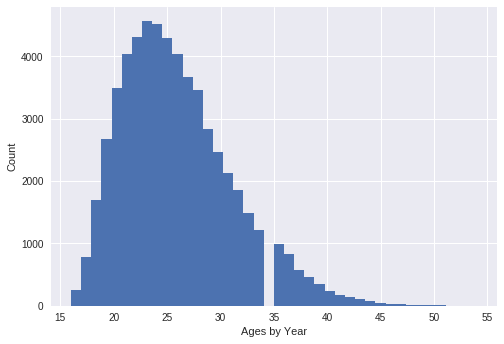

In [76]:
normalAgeBoxers.age.hist(stacked=True, bins=40)
plt.xlabel('Ages by Year')
plt.ylabel('Count')

Text(0,0.5,'Count')

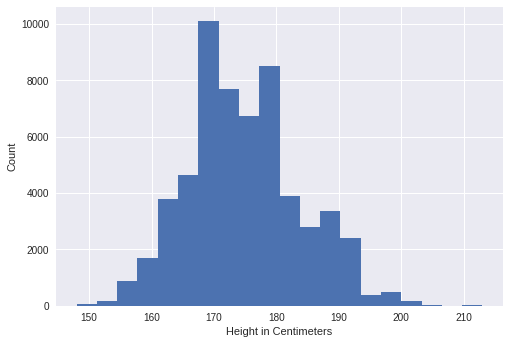

In [75]:
normalAgeBoxers.height.hist(stacked=True, bins=20)
plt.xlabel('Height in Centimeters')
plt.ylabel('Count')

Text(0,0.5,'Count')

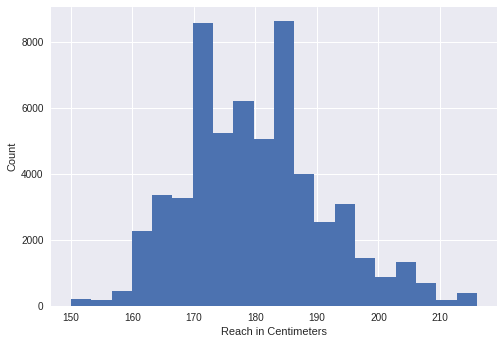

In [79]:
normalAgeBoxers.reach.hist(stacked=True, bins=20)
plt.xlabel('Reach in Centimeters')
plt.ylabel('Count')

Text(0,0.5,'Count')

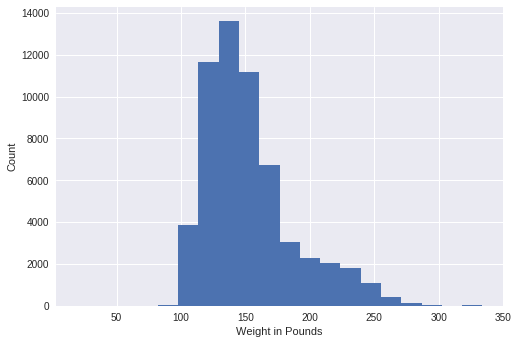

In [78]:
normalAgeBoxers.weight.hist(stacked=True, bins=20)
plt.xlabel('Weight in Pounds')
plt.ylabel('Count')

###How do these characteristics compare between winners and losers?

A violinplot of the characteristics for boxers in each result shows hints of the importance of height and reach advantage, with the reverse true for age and weight advantage. It appears that fighters who are lighter, taller, longer, and younger than their opponents are more likely to win. Comparing the internal box plots, we can also see the largest discrepancy between the measure of central tendency for winners and losers is in the age characteristic.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


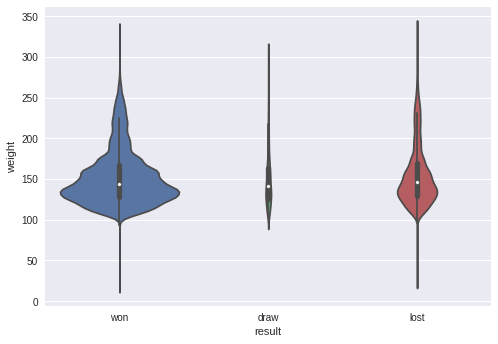

In [19]:
ax = sns.violinplot(x="result", y="weight", data=normalAgeBoxers, scale="count")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


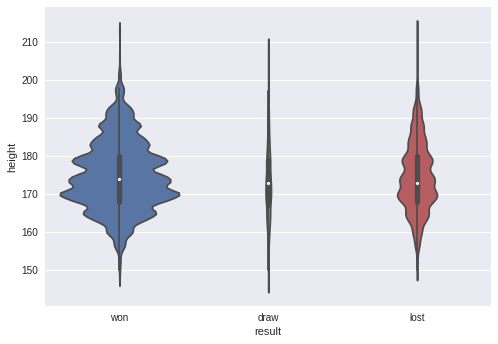

In [20]:
ax = sns.violinplot(x="result", y="height", data=normalAgeBoxers, scale="count")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


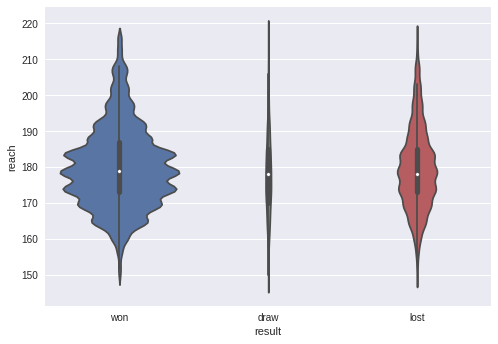

In [21]:
ax = sns.violinplot(x="result", y="reach", data=normalAgeBoxers, scale="count")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


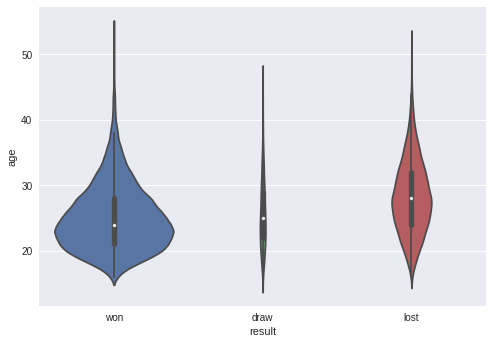

In [22]:
ax = sns.violinplot(x="result", y="age", data=normalAgeBoxers, scale="count")

----------------------
# T-tests

In [23]:
print(np.sum(normalAgeBoxers['result'] == 'won'))
print(np.sum(normalAgeBoxers['result'] == 'lost'))


41930
14009


###A note on the disparity in values between winning and losing boxers

"There admittedly are inaccuracies and anomalies, especially in the All Time ratings, mostly because of incomplete records in the BoxRec database. Although a boxer’s own record may be complete, his opponents’ records may not be complete. Pre-World War II boxers in particular are at somewhat of a disadvantage, vis-à-vis modern boxers. Their opponents’ records often are quite incomplete--because of the scarcity of source material or Editors' time--while the records of opponents of more current boxers may be quite complete."

[Source](http://boxrec.com/media/index.php/BoxRec_Ratings_Description#Introduction)

###Preparing samples of winning and losing boxers
Given the size of the losing boxers, we take a random sample of 14009 values from the winning boxers and set a random_state of 0 to make it reproducible.

In [0]:
losingBoxers = normalAgeBoxers[normalAgeBoxers['result']=='lost']

losingBoxersSample = losingBoxers

In [0]:
winningBoxers = normalAgeBoxers[normalAgeBoxers['result']=='won']

winningBoxersSample = winningBoxers.sample(n=14009, random_state=0)

In [0]:
import scipy
from scipy import stats
from scipy.stats import ttest_ind

###Are the differences between winners and losers statistically significant?
Our t-test comparing characteristics in winners versus losers, we see that the p-value is very small in each test. This indicates that it is nearly impossible that these samples could have come from the same data set by chance. Thus, we can see that the differences of each characteristict (age, weight, reach, and height; respectively) between winners and losers is statistically significant.

In [27]:
stats.ttest_ind(winningBoxersSample['age'], losingBoxersSample['age'])

Ttest_indResult(statistic=-50.46842579275949, pvalue=0.0)

In [28]:
stats.ttest_ind(winningBoxersSample['weight'], losingBoxersSample['weight'])

Ttest_indResult(statistic=-6.381442994153971, pvalue=1.7816780700517293e-10)

In [29]:
stats.ttest_ind(winningBoxersSample['reach'], losingBoxersSample['reach'])

Ttest_indResult(statistic=4.353354075088023, pvalue=1.3454518787253618e-05)

In [30]:
stats.ttest_ind(winningBoxersSample['height'], losingBoxersSample['height'])

Ttest_indResult(statistic=4.171265018113726, pvalue=3.038248693016981e-05)

----------------------
# Additional Research Proposal

Given the t-test results, it will be interesting to use a random forest and find which characteristics correlate most strongly with winning. Additionally, it may also be interesting to run the characteristics against the different decisions. For example, lighter boxers may win more than heavier boxers overall. However, heavier boxers may tend to win more via knockouts than lighter boxers.